# ERA 5 time series of snowfall in November and December 1999

Created by Eric S. Martinez  
22 June 2021

## Load Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import datetime


## Load ERA5 Hourly Snowfall Dataset

In [2]:
# Reading in datasets
# Creating different "datasets" for the different dimensions

pathname = '/Users/atoc_reu_student/Downloads/ERA5/Data/Hourly/'
filename = 'era5_sl_hourly_Antarctic_snowfall_1999_nov_dec.nc'
full_dataset = xr.open_mfdataset(pathname+filename)
e5_sf = full_dataset.sf
lon = full_dataset.longitude
lat = full_dataset.latitude
time = full_dataset.time


In [3]:
time

<xarray.DataArray 'time' (time: 1464)>
array(['1999-11-01T00:00:00.000000000', '1999-11-01T01:00:00.000000000',
       '1999-11-01T02:00:00.000000000', ..., '1999-12-31T21:00:00.000000000',
       '1999-12-31T22:00:00.000000000', '1999-12-31T23:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1999-11-01 ... 1999-12-31T23:00:00
Attributes:
    long_name:  time

In [4]:
# Setting the time variable to a simpler, more usable format

time = np.array(time) # Making the time 'dataset' into an array
time_dates = [] # Creating a blank array called 'time_dates'
for i in range(len(time)):
    string = time[i].astype(str)
    split = string.split("T", 1)
    time_dates.append(split[0])


## Setting the quarterly coordinates to the point closest to both the Cavity and Channel camps

In [5]:
# Locations of AWS stations at Thwaites Cavity and Channel Camps

# cavity lat = -75.033
# cavity lon = -105.617 
# channel lat = -75.050
# channel lon = -105.4334 

# Setting the gridpoints to the nearest point in reality

# Converting the snowfall into millimeters, making it easier to read
e5_sf_cavity_channel_loc_mm = np.array(e5_sf[:,660,1018]) * (10 ** 3)
# Snowfall in meters (what the data actually is)
e5_sf_cavity_channel_loc_m = np.array(e5_sf[:,660,1018])


In [6]:
np.amax(e5_sf_cavity_channel_loc_m)

0.0014414182

In [7]:
time[756]


numpy.datetime64('1999-12-02T12:00:00.000000000')

In [8]:
e5_sf_cavity_channel_loc_mm[800]

0.32573986

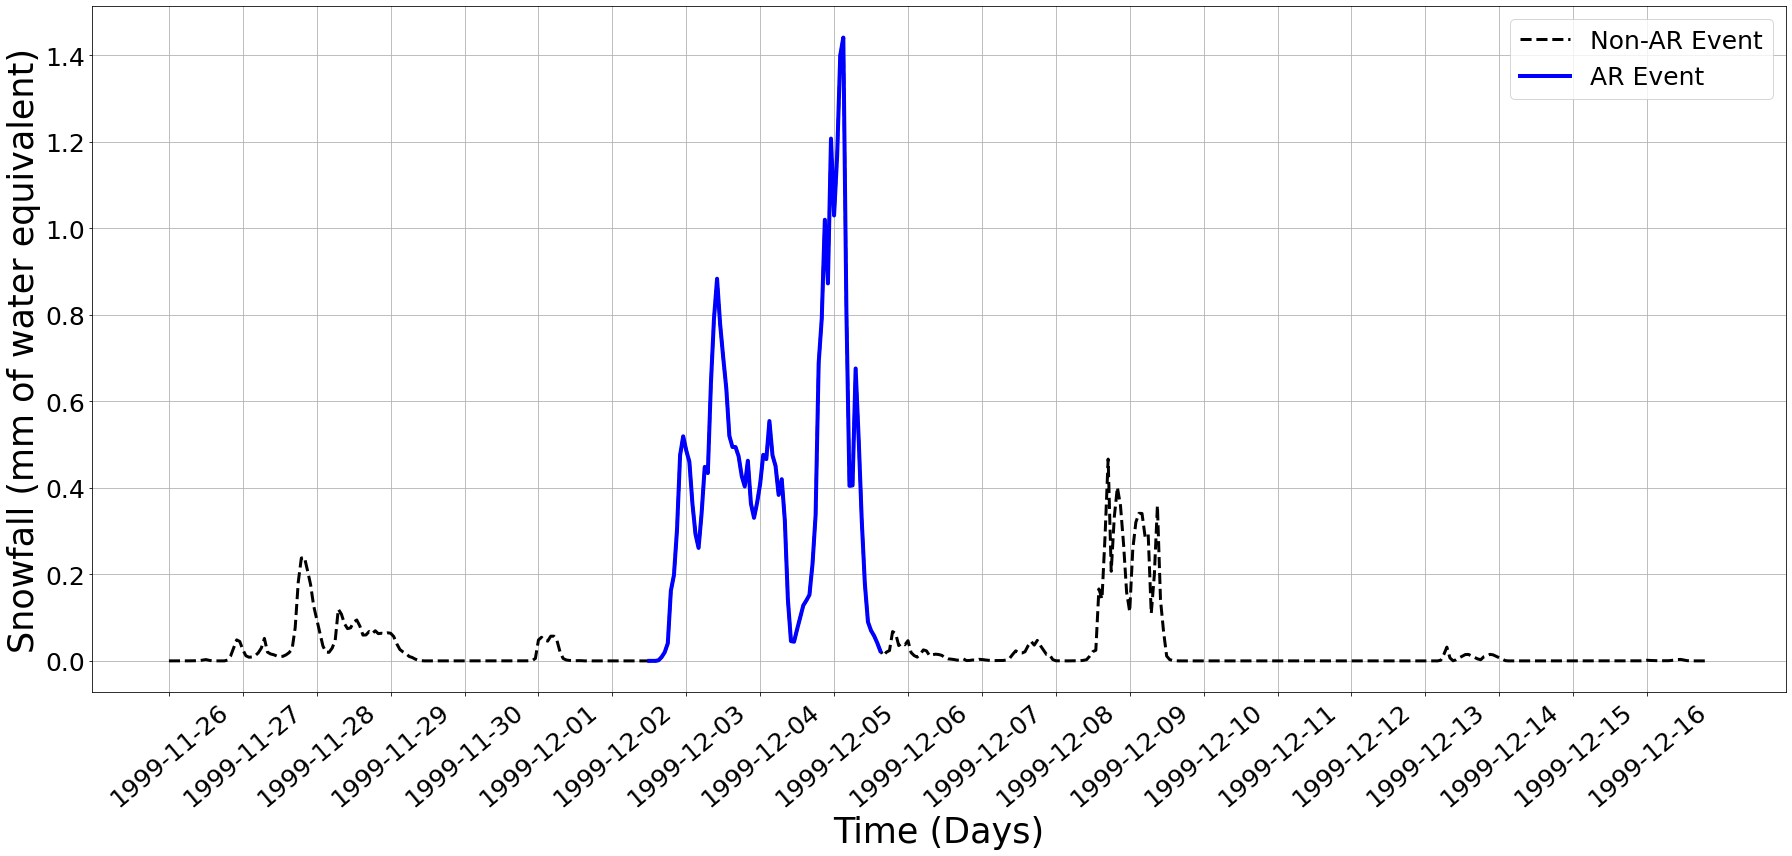

In [9]:
# Plotting time series of snowfall due to AR event in millimeters
plt.figure(figsize=(25,12))
xaxis = np.linspace(0, len(time)-1, len(time))
plt.plot(xaxis[600:1101],e5_sf_cavity_channel_loc_mm[600:1101], '--', linewidth = 3, color = 'black', label = 'Non-AR Event')
plt.plot(xaxis[756:832],e5_sf_cavity_channel_loc_mm[756:832], linewidth = 4, color = 'blue', label = 'AR Event')
plt.xticks(xaxis[600:1101][::24], time_dates[600:1101][::24], rotation = 40, fontsize = 25)
plt.yticks(fontsize = 25)
plt.xlabel('Time (Days)', fontsize = 35)
plt.ylabel('Snowfall (mm of water equivalent)', fontsize = 35)
plt.grid()
plt.legend(loc = 'upper right', prop = {'size': 25})
plt.tight_layout()
plt.savefig("/Users/atoc_reu_student/Downloads/ERA5/Figures/Hourly/era5_snowfall_nov26_dec16.jpg", dpi = 100)
plt.show()



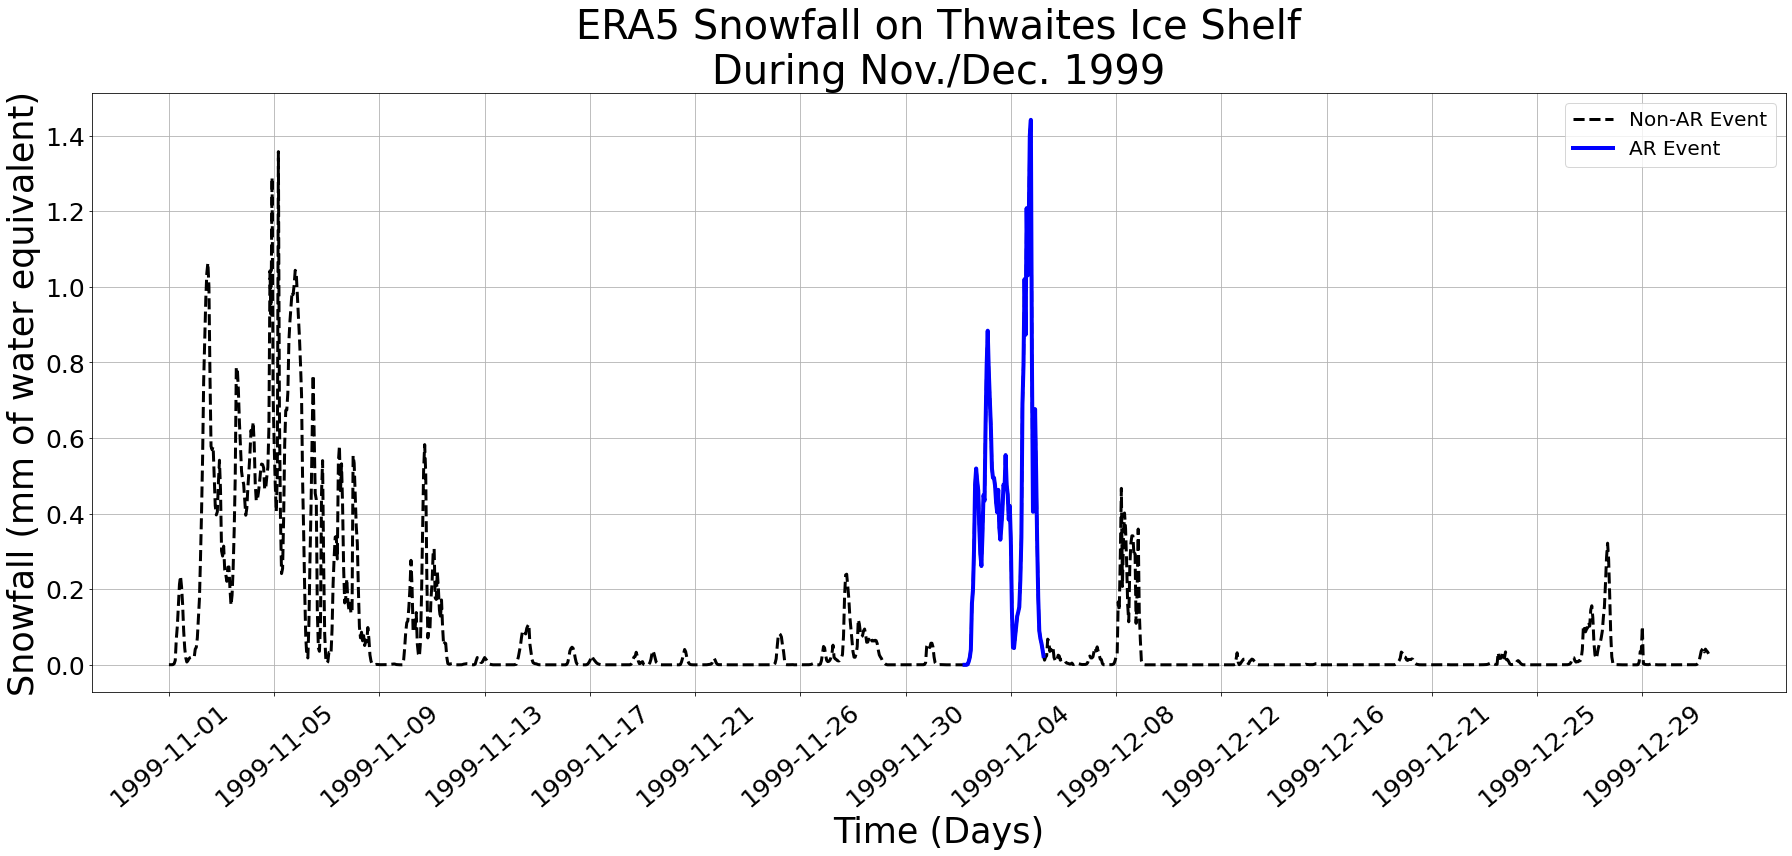

In [10]:
# Plotting time series of snowfall due to AR event in meters
plt.figure(figsize=(25,12))
xaxis = np.linspace(0, len(time)-1, len(time))
plt.plot(xaxis, e5_sf_cavity_channel_loc_mm, '--', linewidth = 3, color = 'black', label = 'Non-AR Event')
plt.plot(xaxis[756:832],e5_sf_cavity_channel_loc_mm[756:832], linewidth = 4, color = 'blue', label = 'AR Event') # Ask Michelle about length of AR event
plt.xticks(xaxis[::100], time_dates[::100], rotation = 40, fontsize = 25)
plt.yticks(fontsize = 25)
plt.xlabel('Time (Days)', fontsize = 35)
plt.ylabel('Snowfall (mm of water equivalent)', fontsize = 35)
plt.title('ERA5 Snowfall on Thwaites Ice Shelf\n' + 'During Nov./Dec. 1999', fontsize = 40)
plt.grid()
plt.legend(loc = 'upper right', prop = {'size': 20})
plt.tight_layout()
plt.savefig("/Users/atoc_reu_student/Downloads/ERA5/Figures/Hourly/era5_snowfall_nov1_dec29.jpg", dpi = 100)
plt.show()

## Trying to plot a cumulative plot of snowfall

In [11]:
sf_cumsum = np.cumsum(e5_sf_cavity_channel_loc_mm)
sf_cumsum_ar_event = np.cumsum(e5_sf_cavity_channel_loc_mm[756:832])
sf_cumsum_ar_event_ba = np.cumsum(e5_sf_cavity_channel_loc_mm[600:1100])

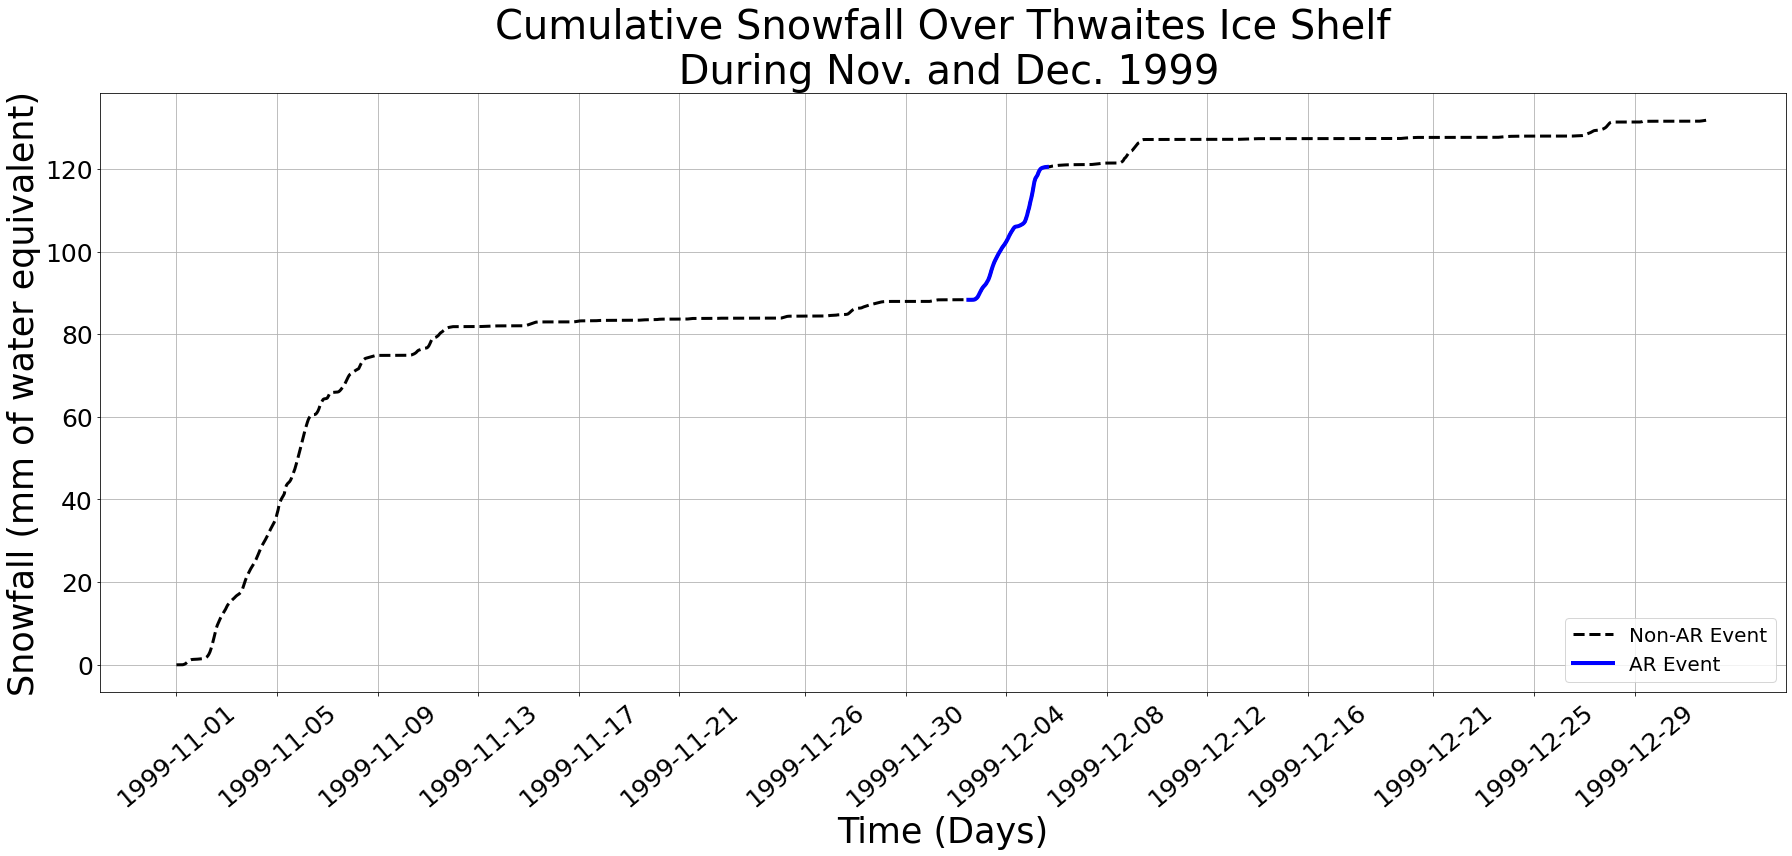

In [12]:
# Plotting time series of cumulative snowfall over the entire dataset (November and December of 1999)
plt.figure(figsize=(25,12))
plt.plot(time, sf_cumsum, '--', color = 'black', linewidth = 3, label = 'Non-AR Event')
plt.plot(time[756:832], sf_cumsum[756:832], color = 'blue', linewidth = 4, label = 'AR Event')
plt.xticks(time_dates[::100], rotation = 40, fontsize = 25)
plt.yticks(fontsize = 25)
plt.title('Cumulative Snowfall Over Thwaites Ice Shelf\n During Nov. and Dec. 1999', fontsize = 40)
plt.ylabel('Snowfall (mm of water equivalent)', fontsize = 35)
plt.xlabel('Time (Days)', fontsize = 35)
plt.grid()
plt.tight_layout()
plt.legend(loc = 'lower right', prop = {'size': 20})
plt.savefig("/Users/atoc_reu_student/Downloads/ERA5/Figures/Hourly/era5_cumulative_snowfall_nov1_dec29.jpg", dpi = 100)
plt.show()


In [13]:
np.amax(sf_cumsum_ar_event)

32.15089

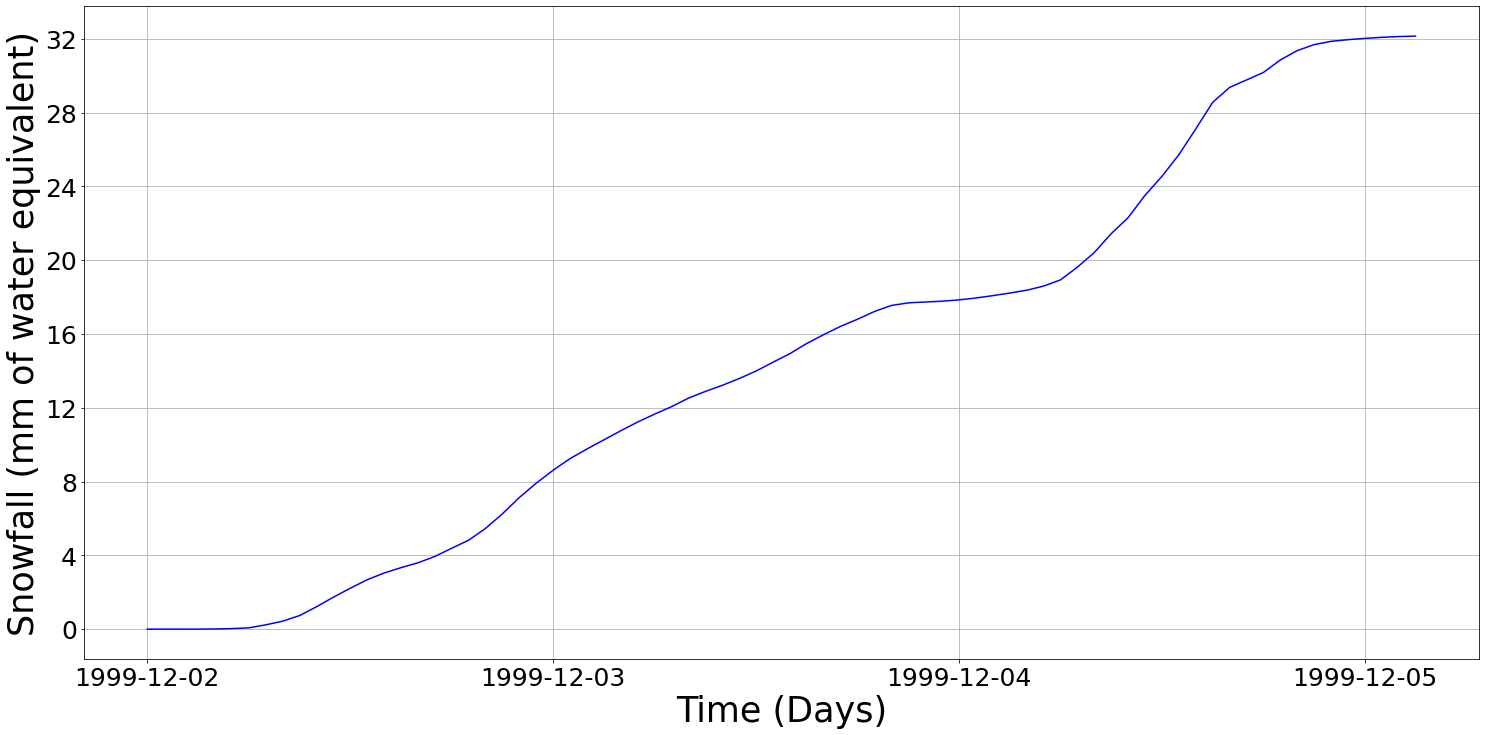

In [14]:
# Plotting cumulative snowfall over ONLY the indicated AR event
plt.figure(figsize = (25,12))
plt.plot(time[756:832], sf_cumsum_ar_event, color = 'blue')
plt.xticks(time[756:832][::24], fontsize = 25)
plt.yticks(np.arange(0,max(sf_cumsum_ar_event), 4), fontsize = 25)
plt.ylabel('Snowfall (mm of water equivalent)', fontsize = 35)
plt.xlabel('Time (Days)', fontsize = 35)
plt.grid()
plt.savefig("/Users/atoc_reu_student/Downloads/ERA5/Figures/Hourly/era5_cumulative_snowfall_dec2_dec5.jpg", dpi = 100)
plt.show()

In [ ]:
# Plotting v10m time series over entire two months of data
plt.figure(figsize = (25, 12))
xaxis = np.linspace(0, len(time)-1, len(time))
plt.plot(time[600:1100], e5_v10_cavity_channel_loc[600:1100], '--', linewidth = 5, color = 'black', label = 'Non-AR Event')
plt.plot(time[756:832], e5_v10_cavity_channel_loc[756:832], linewidth = 7, color = 'green', label = 'AR Event')
plt.ylabel(r'Meridional Wind Speed (m$s^{-1}$)', fontsize = 40)
plt.xticks(time[600:1100][::48], rotation = 40, fontsize = 30)
plt.yticks(fontsize = 30)
plt.legend(loc = 'lower right', prop = {'size':35})
plt.grid()
plt.savefig("/Users/atoc_reu_student/Downloads/ERA5/Figures/Hourly/era5_meridional_wind_speeds_nov26_dec16.jpg", dpi = 100)
plt.show()


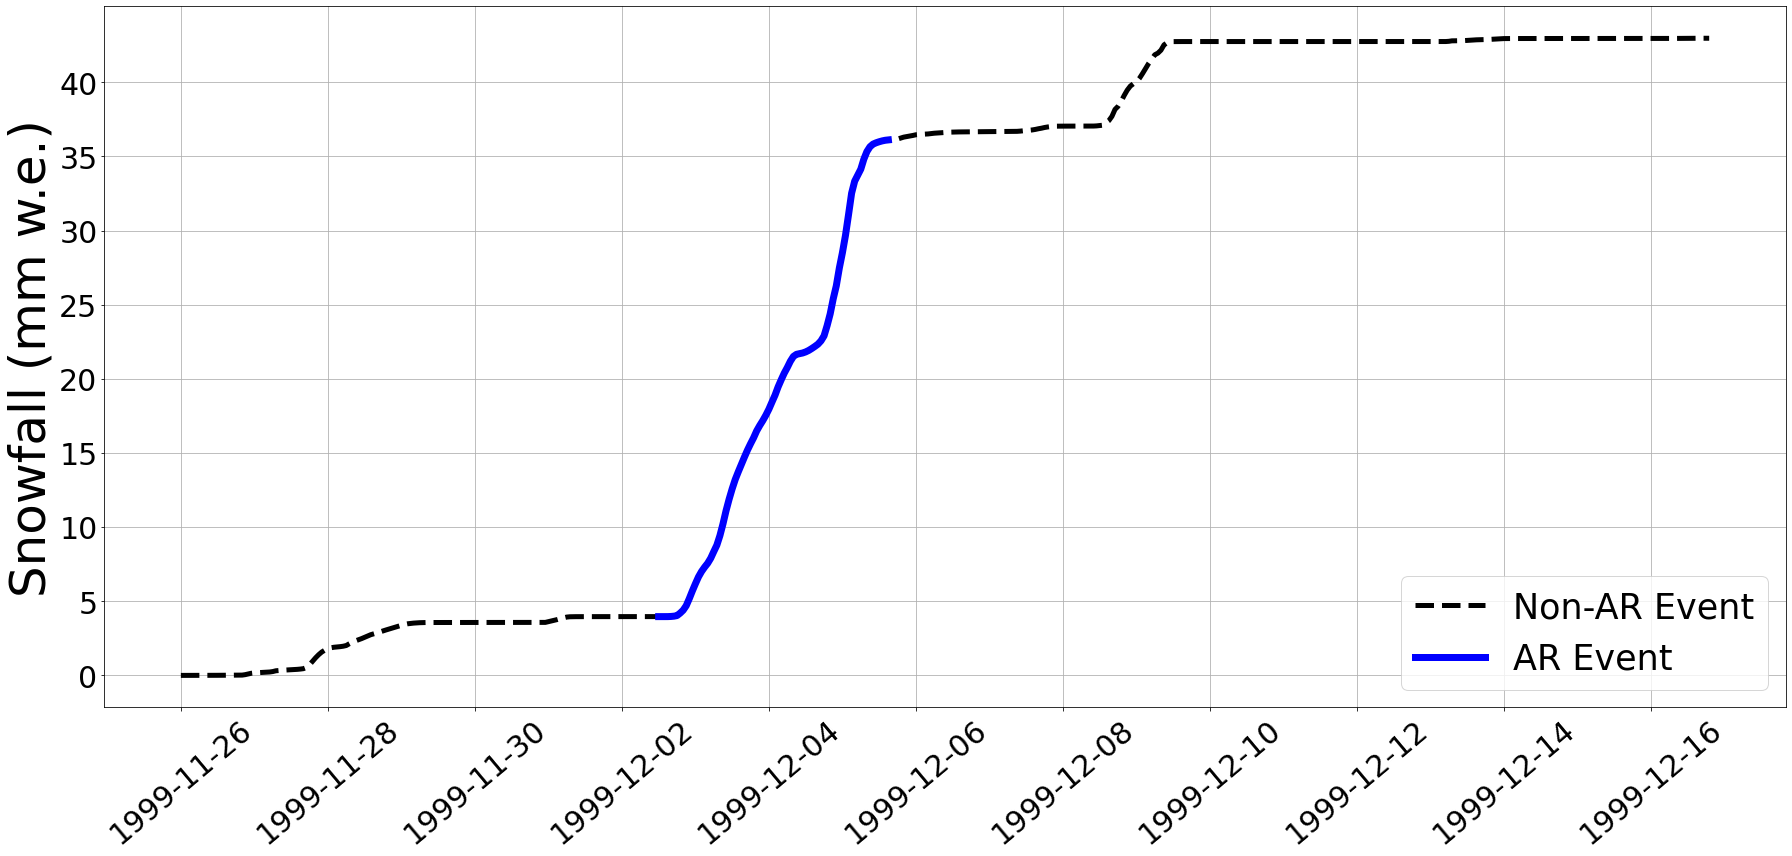

In [19]:
# Plotting time series of cumulative snowfall over the entire dataset (November and December of 1999)
plt.figure(figsize=(25,12))
plt.plot(time[600:1100], sf_cumsum_ar_event_ba, '--', color = 'black', linewidth = 5, label = 'Non-AR Event')
plt.plot(time[756:832], sf_cumsum_ar_event_ba[156:232], color = 'blue', linewidth = 7, label = 'AR Event')
plt.xticks(time_dates[600:1100][::48], rotation = 40, fontsize = 30)
plt.yticks(np.arange(0, max(sf_cumsum_ar_event_ba), 5), fontsize = 30)
plt.ylabel('Snowfall (mm w.e.)', fontsize = 50)
plt.grid()
plt.tight_layout()
plt.legend(loc = 'lower right', prop = {'size': 35})
plt.savefig("/Users/atoc_reu_student/Downloads/ERA5/Figures/Hourly/era5_cumulative_snowfall_nov26_dec16.jpg", dpi = 100)
plt.show()


### Trying to make a plot with all three plots in one figure

In [44]:
path_name = '/Users/atoc_reu_student/Downloads/ERA5/Data/Hourly/'
file_name = 'era5_sl_hourly_Antarctic_v10m_1999_nov_dec.nc'
full_dataset = xr.open_mfdataset(path_name+file_name)
longitude = full_dataset.longitude
latitude = full_dataset.latitude
time = full_dataset.time
e5_v10 = full_dataset.v10
e5_v10_cavity_channel_loc = np.array(e5_v10[:,660,1018])

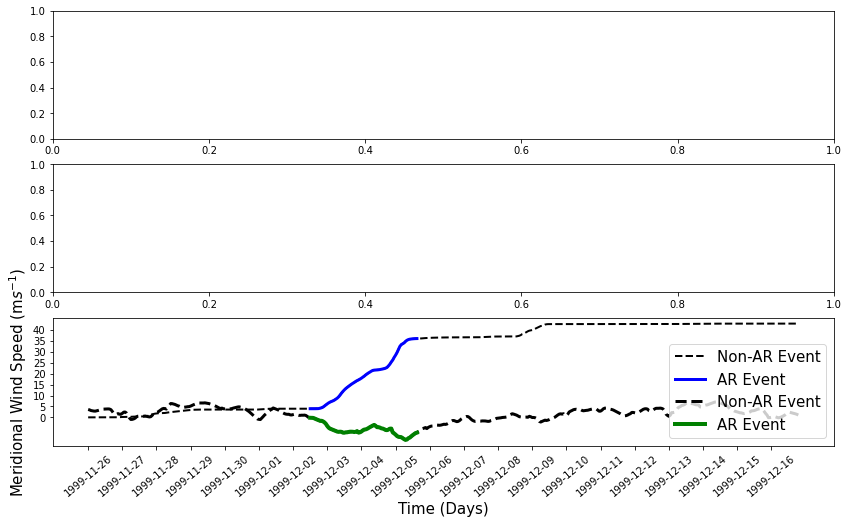

In [47]:
f, ax = plt.subplots(nrows=3, ncols=1, figsize=(14,8))
ax[0] = plt.plot(time[600:1100], sf_cumsum_ar_event_ba, '--', color = 'black', linewidth = 2, label = 'Non-AR Event')
ax[0] = plt.plot(time[756:832], sf_cumsum_ar_event_ba[156:232], color = 'blue', linewidth = 3, label = 'AR Event')
ax[0] = plt.xticks(time_dates[600:1100][::24], rotation = 40, fontsize = 10)
ax[0] = plt.yticks(np.arange(0, max(sf_cumsum_ar_event_ba), 5), fontsize = 10)
ax[0] = plt.ylabel('Snowfall (mm w.e.)', fontsize = 15)
ax[0] = plt.xlabel('Time (Days)', fontsize = 15)
ax[0] = plt.grid()
ax[0] = plt.legend(loc = 'lower right', prop = {'size': 15})

ax[1] = plt.plot(time[600:1100], e5_v10_cavity_channel_loc[600:1100], '--', linewidth = 3, color = 'black', label = 'Non-AR Event')
ax[1] = plt.plot(time[756:832], e5_v10_cavity_channel_loc[756:832], linewidth = 4, color = 'green', label = 'AR Event')
ax[1] = plt.xlabel('Time (Days)', fontsize = 15)
ax[1] = plt.ylabel(r'Meridional Wind Speed (m$s^{-1}$)', fontsize = 15)
ax[1] = plt.yticks(fontsize = 10)
ax[1] = plt.legend(loc = 'lower right', prop = {'size':15})
ax[1] = plt.grid()